In [87]:
#upload the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/global air pollution dataset.csv')


In [88]:
df.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [89]:
#Explore it
print(df.shape)
df.info()

(23463, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [90]:
#identify the null elements
df.isna().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [91]:

missing_country = df['Country'].isnull().sum()
total_rows = len(df)
percent = (missing_country / total_rows) * 100
print(f"Valeurs manquantes Country: {missing_country} ({percent:.2f}%)")

Valeurs manquantes Country: 427 (1.82%)


In [92]:
df['Country'] = df['Country'].fillna('Unknown')

In [93]:
df[df['Country'] == 'Unknown']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,Unknown,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,Unknown,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,Unknown,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,Unknown,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,Unknown,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,Unknown,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,Unknown,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,Unknown,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,Unknown,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


In [94]:
df[df['City'].isna()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


In [95]:
df = df.dropna(subset=['City'])

In [96]:
df.isna().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [97]:
df = df.drop_duplicates()
df.shape

(23462, 12)

In [98]:
def indx():
    indexes = []  # avoid naming variables 'list' (it overwrites Python's built-in list)
    for i, country in enumerate(df['Country']):  # enumerate gives both index and value
        if country == 'Israel':
            indexes.append(i)
    return indexes

lst=indx()
df = df.drop(index=lst)   # removes the row with index 5

df.shape


(23416, 12)

In [99]:
df['Country']

,Country
0,Russian Federation
1,Brazil
2,Italy
3,Poland
4,France
...,...
23458,India
23459,France
23460,India
23461,United States of America


In [100]:
nb_pays = df['Country'].nunique()
nb_villes = df['City'].nunique()

print(f"Nombre de pays uniques : {nb_pays}")
print(f"Nombre de villes uniques : {nb_villes}")

Nombre de pays uniques : 176
Nombre de villes uniques : 23416


In [101]:
# compter le nombre de lignes par pays
top_pays = df['Country'].value_counts().head(10)

print("Top 10 des pays les plus mesurés :")
print(top_pays)


Top 10 des pays les plus mesurés :
Country
United States of America    2866
India                       2482
Brazil                      1559
Germany                     1344
Russian Federation          1239
Italy                        979
France                       802
China                        793
Japan                        700
Mexico                       586
Name: count, dtype: int64


In [102]:
df[['CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']].corr()

,CO AQI Value,NO2 AQI Value,Ozone AQI Value,PM2.5 AQI Value
CO AQI Value,1.000000,0.487382,0.146319,0.439126
NO2 AQI Value,0.487382,1.000000,-0.181502,0.260139
Ozone AQI Value,0.146319,-0.181502,1.000000,0.340558
PM2.5 AQI Value,0.439126,0.260139,0.340558,1.000000


<Axes: >

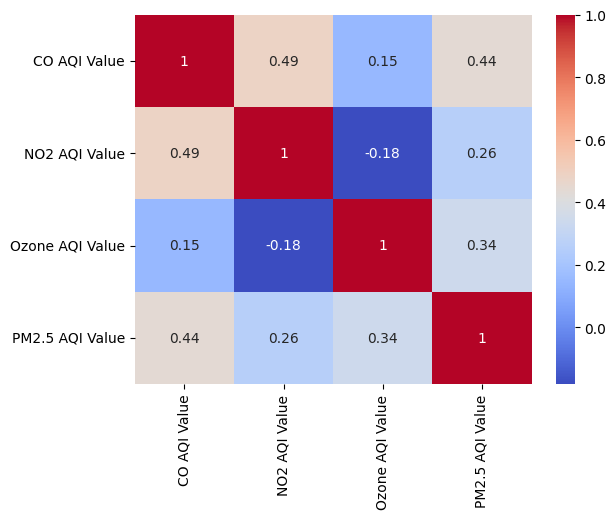

In [103]:
sns.heatmap(df[['CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']].corr(), annot=True, cmap='coolwarm')

In [104]:
mean_aqi = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)

print("Classement des pays selon la moyenne de l’AQI global :")
print(mean_aqi.head(10))

Classement des pays selon la moyenne de l’AQI global :
Country
Republic of Korea       421.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                178.800654
United Arab Emirates    163.666667
Aruba                   163.000000
Kuwait                  162.000000
Qatar                   157.500000
India                   152.910959
Senegal                 152.424242
Name: AQI Value, dtype: float64


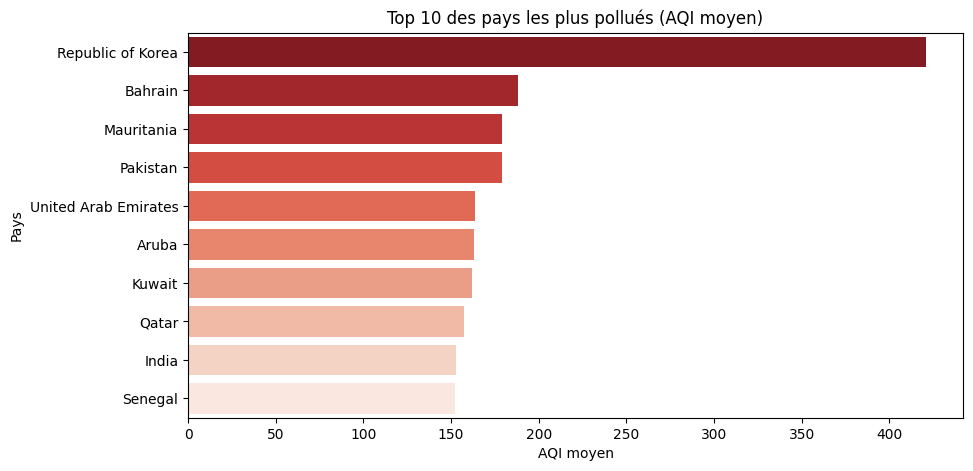

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(x=mean_aqi.head(10).values, y=mean_aqi.head(10).index,  hue=mean_aqi.head(10).index, palette="Reds_r",legend=False)
plt.title("Top 10 des pays les plus pollués (AQI moyen)")
plt.xlabel("AQI moyen")
plt.ylabel("Pays")
plt.show()

In [ ]:
import plotly.express as px

mean_aqi_df = mean_aqi.reset_index()
mean_aqi_df.columns = ['Country', 'AQI']

fig = px.choropleth(mean_aqi_df, locations="Country", locationmode="country names",
                    color="AQI", hover_name="Country",
                    color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title="AQI moyen par pays")
fig.show()
